# Preetham Kasyap
# 210968190

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-09-01 17:54:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   220MB/s    in 0.3s    

2023-09-01 17:54:37 (220 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [7]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [8]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.475.jpg', 'cat.164.jpg', 'cat.84.jpg', 'cat.95.jpg', 'cat.158.jpg', 'cat.942.jpg', 'cat.114.jpg', 'cat.853.jpg', 'cat.559.jpg', 'cat.268.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


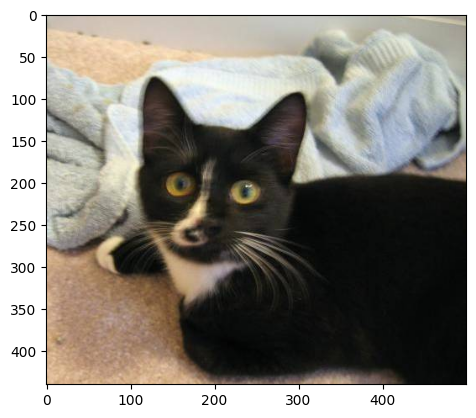

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[10])))

In [10]:
im = mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0]))

# VGG16

In [11]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [12]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
history1 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
50/50 [==============================] - 10s 204ms/step - loss: 0.1783 - acc: 0.9550 - val_loss: 0.1607 - val_acc: 0.9660
Epoch 2/5
50/50 [==============================] - 10s 206ms/step - loss: 0.1558 - acc: 0.9700 - val_loss: 0.1360 - val_acc: 0.9810
Epoch 3/5
50/50 [==============================] - 15s 312ms/step - loss: 0.1383 - acc: 0.9780 - val_loss: 0.1195 - val_acc: 0.9870
Epoch 4/5
50/50 [==============================] - 10s 208ms/step - loss: 0.1192 - acc: 0.9780 - val_loss: 0.1067 - val_acc: 0.9880
Epoch 5/5
50/50 [==============================] - 10s 208ms/step - loss: 0.1065 - acc: 0.9870 - val_loss: 0.0947 - val_acc: 0.9940


In [15]:
model.evaluate(validation_generator)

50/50 [==============================] - 5s 102ms/step - loss: 0.0947 - acc: 0.9940


[0.09473366290330887, 0.9940000176429749]

Text(0, 0.5, 'Accuracy')

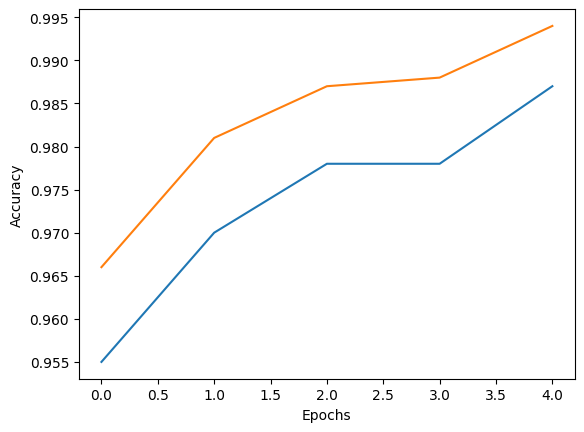

In [16]:
from matplotlib import pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

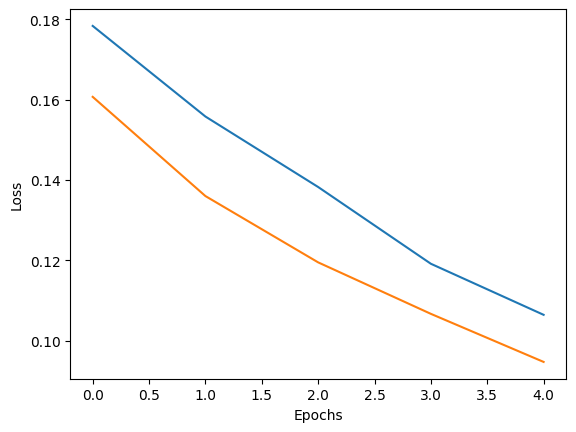

In [17]:
from matplotlib import pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

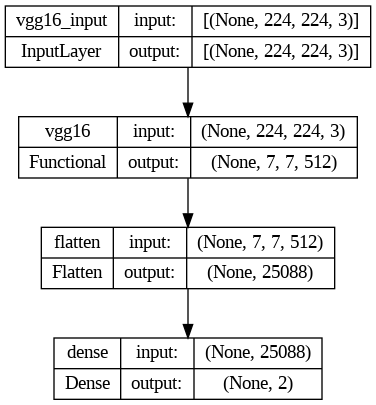

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

# ResNet50

In [19]:
from keras.applications import ResNet50
base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [20]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
history2 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
50/50 [==============================] - 13s 174ms/step - loss: 0.7517 - acc: 0.5480 - val_loss: 0.6414 - val_acc: 0.6270
Epoch 2/5
50/50 [==============================] - 7s 150ms/step - loss: 0.6697 - acc: 0.6060 - val_loss: 0.6124 - val_acc: 0.6510
Epoch 3/5
50/50 [==============================] - 8s 150ms/step - loss: 0.6420 - acc: 0.6270 - val_loss: 0.5981 - val_acc: 0.6780
Epoch 4/5
50/50 [==============================] - 8s 151ms/step - loss: 0.6478 - acc: 0.6190 - val_loss: 0.6079 - val_acc: 0.6580
Epoch 5/5
50/50 [==============================] - 7s 149ms/step - loss: 0.6332 - acc: 0.6450 - val_loss: 0.6341 - val_acc: 0.6150


In [22]:
model.evaluate(validation_generator)

50/50 [==============================] - 4s 75ms/step - loss: 0.6341 - acc: 0.6150


[0.6340687274932861, 0.6150000095367432]

Text(0, 0.5, 'Accuracy')

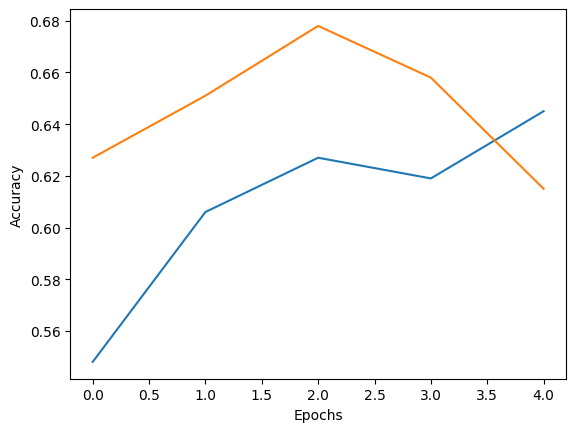

In [23]:
from matplotlib import pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

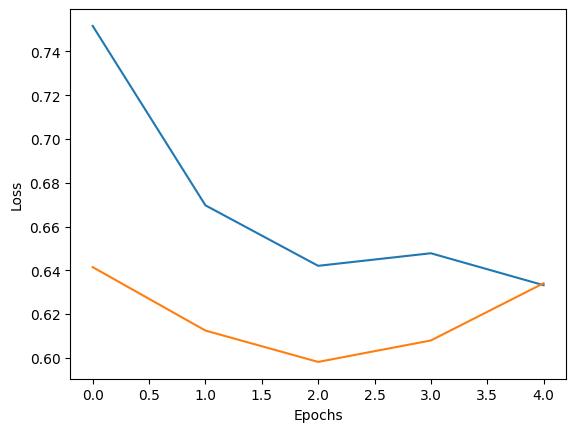

In [24]:
from matplotlib import pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# MobileNetV2

In [25]:
from keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [26]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
history3 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
50/50 [==============================] - 9s 120ms/step - loss: 0.1471 - acc: 0.9440 - val_loss: 0.0052 - val_acc: 0.9980
Epoch 2/5
50/50 [==============================] - 4s 87ms/step - loss: 0.0051 - acc: 0.9980 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/5
50/50 [==============================] - 5s 103ms/step - loss: 9.7737e-04 - acc: 1.0000 - val_loss: 6.0688e-04 - val_acc: 1.0000
Epoch 4/5
50/50 [==============================] - 4s 89ms/step - loss: 5.4935e-04 - acc: 1.0000 - val_loss: 4.4725e-04 - val_acc: 1.0000
Epoch 5/5
50/50 [==============================] - 4s 88ms/step - loss: 4.3001e-04 - acc: 1.0000 - val_loss: 3.7481e-04 - val_acc: 1.0000


In [29]:
model.evaluate(validation_generator)

50/50 [==============================] - 2s 45ms/step - loss: 3.7481e-04 - acc: 1.0000


[0.0003748093731701374, 1.0]

Text(0, 0.5, 'Accuracy')

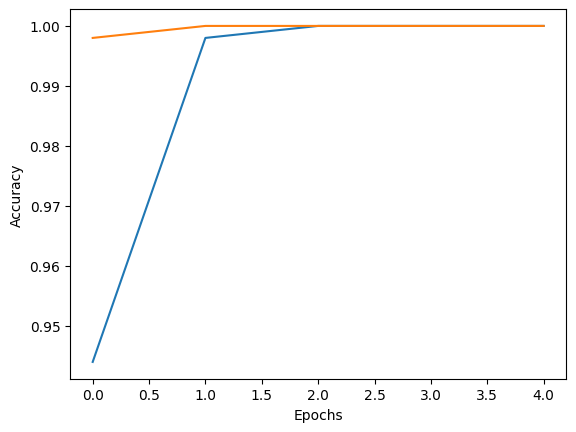

In [30]:
from matplotlib import pyplot as plt
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

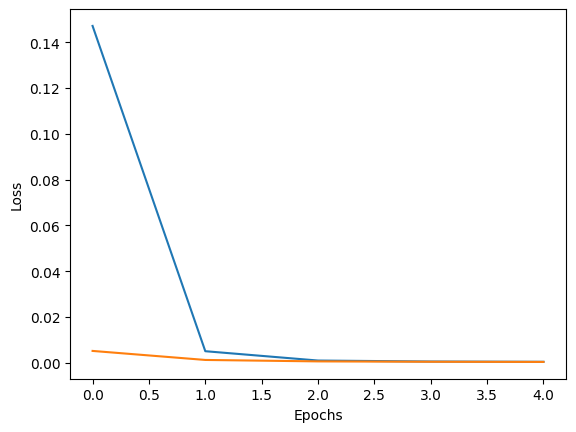

In [31]:
from matplotlib import pyplot as plt
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# EfficientNetB0

In [32]:
from keras.applications import EfficientNetB0
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescal

In [33]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [34]:
history4 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
50/50 [==============================] - 13s 148ms/step - loss: 0.7713 - acc: 0.5030 - val_loss: 0.7170 - val_acc: 0.5000
Epoch 2/5
50/50 [==============================] - 5s 96ms/step - loss: 0.7406 - acc: 0.5340 - val_loss: 0.7535 - val_acc: 0.5000
Epoch 3/5
50/50 [==============================] - 5s 107ms/step - loss: 0.7359 - acc: 0.4930 - val_loss: 0.6986 - val_acc: 0.5000
Epoch 4/5
50/50 [==============================] - 5s 95ms/step - loss: 0.7298 - acc: 0.4820 - val_loss: 0.7057 - val_acc: 0.5000
Epoch 5/5
50/50 [==============================] - 5s 94ms/step - loss: 0.7609 - acc: 0.4610 - val_loss: 0.7462 - val_acc: 0.5000


In [35]:
model.evaluate(validation_generator)

50/50 [==============================] - 3s 50ms/step - loss: 0.7462 - acc: 0.5000


[0.7461754679679871, 0.5]

Text(0, 0.5, 'Accuracy')

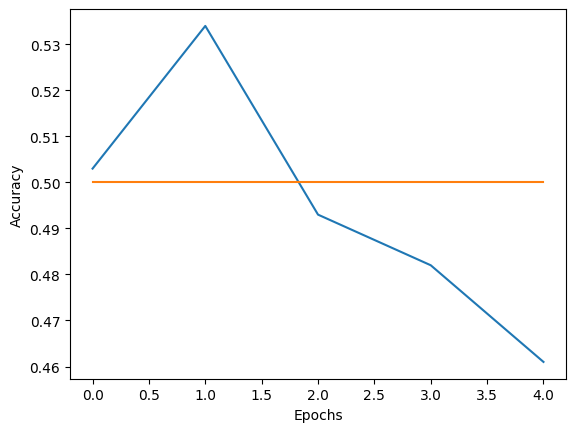

In [36]:
from matplotlib import pyplot as plt
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

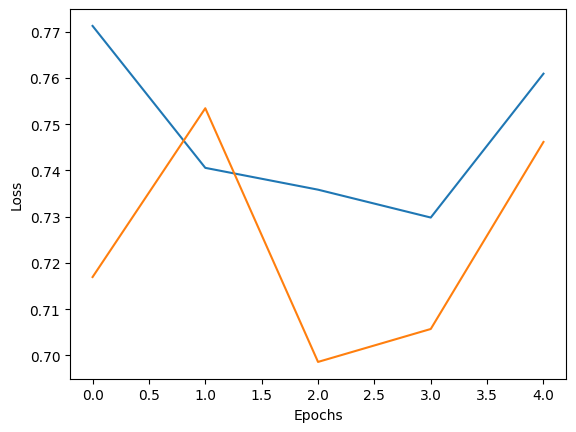

In [37]:
from matplotlib import pyplot as plt
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# GoogleNet

In [38]:
from keras.applications import InceptionV3
base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [39]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [40]:
history5 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
50/50 [==============================] - 13s 141ms/step - loss: 0.1516 - acc: 0.9520 - val_loss: 0.0328 - val_acc: 0.9880
Epoch 2/5
50/50 [==============================] - 5s 104ms/step - loss: 0.0145 - acc: 0.9960 - val_loss: 0.0048 - val_acc: 0.9990
Epoch 3/5
50/50 [==============================] - 5s 107ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/5
50/50 [==============================] - 5s 103ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 5/5
50/50 [==============================] - 6s 116ms/step - loss: 8.8207e-04 - acc: 1.0000 - val_loss: 7.0473e-04 - val_acc: 1.0000


In [42]:
model.evaluate(validation_generator)

50/50 [==============================] - 3s 63ms/step - loss: 7.0473e-04 - acc: 1.0000


[0.0007047252147458494, 1.0]

Text(0, 0.5, 'Accuracy')

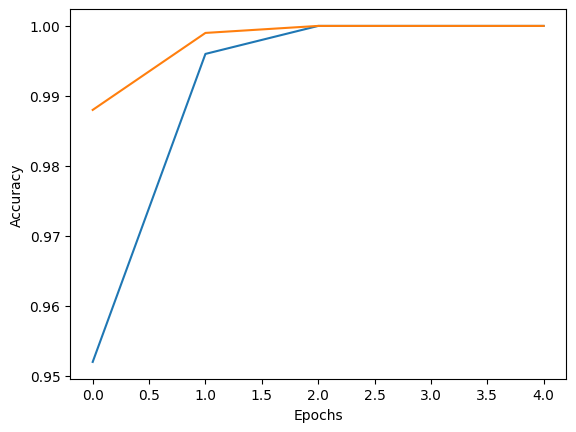

In [43]:
from matplotlib import pyplot as plt
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

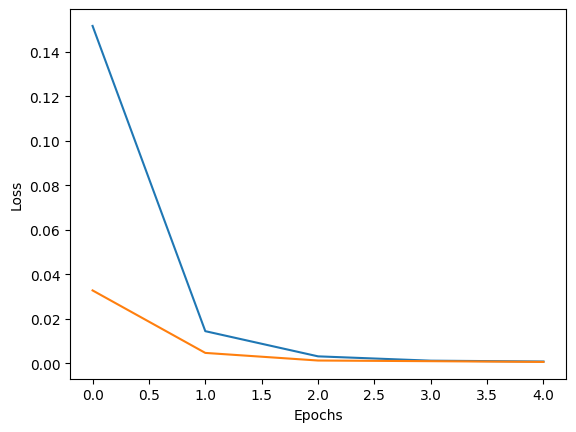

In [44]:
from matplotlib import pyplot as plt
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_alexnet(input_shape=(224, 224, 3), num_classes=2):
    model = Sequential()

    # Layer 1: Convolutional Layer
    model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 2: Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 3: Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))

    # Layer 4: Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))

    # Layer 5: Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten Layer
    model.add(Flatten())

    # Layer 6: Fully Connected Layer
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(0.5))

    # Layer 7: Fully Connected Layer
    model.add(Dense(units=4096, activation='relu'))
    model.add(Dropout(0.5))

    # Layer 8: Output Layer
    model.add(Dense(units=num_classes, activation='sigmoid'))

    return model

# Create AlexNet model
model = create_alexnet()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 8, 8, 384)         885120    
                                                                 
 conv2d_97 (Conv2D)          (None, 6, 6, 384)        

In [46]:
history6 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
50/50 [==============================] - 10s 104ms/step - loss: 0.8327 - accuracy: 0.5050 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 4s 83ms/step - loss: 0.6957 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 4s 85ms/step - loss: 0.6938 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 5s 92ms/step - loss: 0.6930 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
50/50 [==============================] - 4s 81ms/step - loss: 0.6937 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5000


In [47]:
model.evaluate(validation_generator)

50/50 [==============================] - 2s 41ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932101249694824, 0.5]

Text(0, 0.5, 'Accuracy')

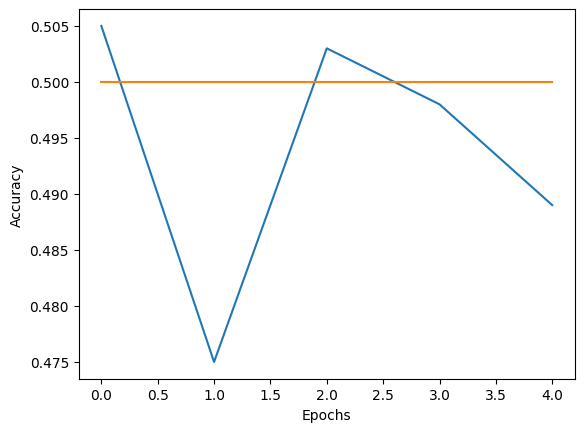

In [49]:
from matplotlib import pyplot as plt
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

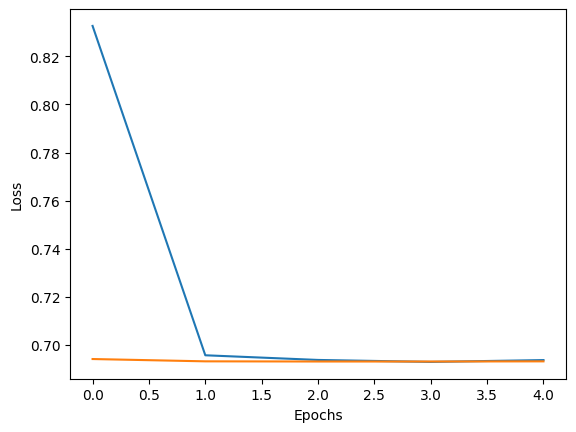

In [50]:
from matplotlib import pyplot as plt
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [52]:
def LeNet5():
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

model = LeNet5()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history7 = model.fit(validation_generator,epochs=5,validation_data=validation_generator)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_102 (Conv2D)         (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 16)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 44944)             0         
                                                                 
 dense_11 (Dense)            (None, 120)              

Text(0, 0.5, 'Loss')

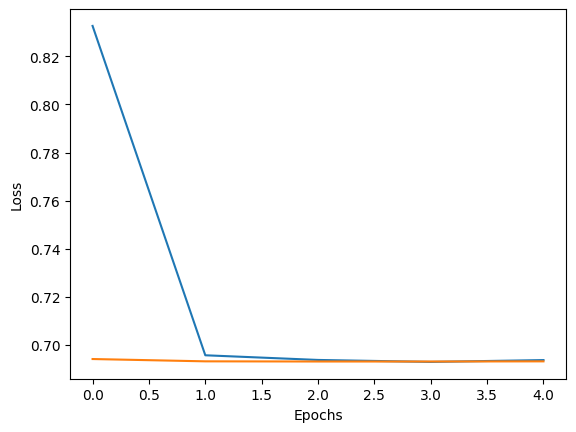

In [53]:
from matplotlib import pyplot as plt
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

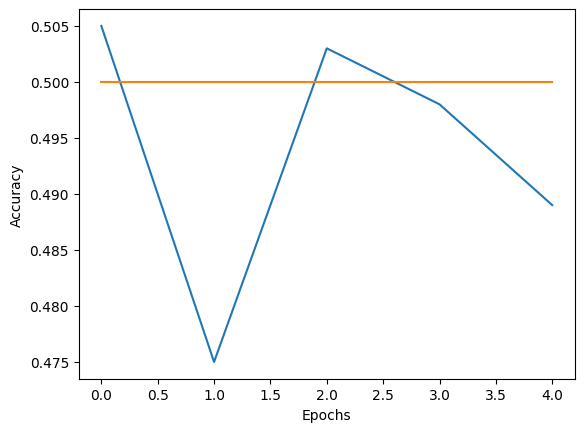

In [54]:
from matplotlib import pyplot as plt
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Horse dataset

In [55]:
local_zip = '/content/drive/MyDrive/DEEPLEARNING/horse and zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

FileNotFoundError: ignored